In [5]:
#로그 파일(비정형 데이터) --> 정형 데이터 형식
import re
import csv
# 로그 파일 경로
log_file_path = 'sample_logs.log'
output_csv_path = 'parsed_logs.csv'

In [ ]:
# 정규 표현식 패턴 정의
log_pattern = re.compile(
    r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s' # IP 주소
    r'- - \[(?P<datetime>[^\]]+)\] ' # 날짜 및 시간
    r'"(?P<method>GET|POST|PUT|DELETE|HEAD) ' # HTTP 메서드
    r'(?P<path>[^ ]+).*?"\s' # 요청 경로
    r'(?P<status>\d{3})\s' # 상태 코드
    r'(?P<size>\d+)' # 응답 크기
)
''' (?P<이름>패턴) 형태는 "이름이 있는 그룹" 으로, 
추출 결과를 딕셔너리처럼groupdict()로 관리할 수 있게 해줍니다.
'''

' (?P<이름>패턴) 형태는 "이름이 있는 그룹" 으로, \n추출 결과를 딕셔너리처럼groupdict()로 관리할 수 있게 해줍니다.\n'

In [8]:
# 파싱된 결과 저장 리스트
parsed_logs = []
# 로그 파일 읽기 및 정규식 적용
with open(log_file_path, 'r') as f:
    for line in f:
        match = log_pattern.search(line)
        if match:
            parsed_logs.append(match.groupdict()) #

In [10]:
# CSV로 저장
with open(output_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['ip', 'datetime', 'method', 'path', 'status', 'size']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for entry in parsed_logs:
        writer.writerow(entry)
print("보안 로그가 CSV로 저장되었습니다:", output_csv_path)

보안 로그가 CSV로 저장되었습니다: parsed_logs.csv


### pandas DataFrame 변환python복사편집 저장

In [1]:
# csv --> pandas DataFrame
import re
import pandas as pd
# 로그 파일 경로
log_file_path = 'sample_logs.log'

# 정규 표현식 패턴 정의
log_pattern = re.compile(
    r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s'
    r'- - \[(?P<datetime>[^\]]+)\] '
    r'"(?P<method>GET|POST|PUT|DELETE) '
    r'(?P<path>[^ ]+).*?" '
    r'(?P<status>\d{3}) '
    r'(?P<size>\d+)'
)

In [2]:
# 결과 저장
log_entries = []

with open(log_file_path, 'r') as f:
    for line in f:
        match = log_pattern.search(line)
        if match:
            entry = match.groupdict()
            # datetime을 datetime 객체로 변환
            entry['datetime'] = pd.to_datetime(entry['datetime'], format='%d/%b/%Y:%H:%M:%S %z')
            entry['status'] = int(entry['status'])
            entry['size'] = int(entry['size'])
            log_entries.append(entry)
            
            
# DataFrame 생성
df = pd.DataFrame(log_entries)

# 결과 확인
print(df.head())

               ip                  datetime method              path  status  \
0   172.29.117.82 2025-06-14 10:59:11+09:00    GET         /home.php     200   
1  10.248.203.131 2025-06-14 11:21:30+09:00    GET  /admin/login.php     403   
2  172.25.180.188 2025-06-14 11:55:08+09:00    GET  /admin/login.php     404   
3  172.22.253.123 2025-06-14 11:18:27+09:00    GET        /dashboard     403   
4  192.168.71.140 2025-06-14 10:38:19+09:00    GET  /admin/login.php     404   

   size  
0   189  
1  1024  
2  2048  
3   512  
4   512  


In [3]:
# 403 추출
df_1 = df[df['status']==403]
print(df_1)

                 ip                  datetime method              path  \
1    10.248.203.131 2025-06-14 11:21:30+09:00    GET  /admin/login.php   
3    172.22.253.123 2025-06-14 11:18:27+09:00    GET        /dashboard   
10   192.168.133.95 2025-06-14 10:35:49+09:00   POST         /api/data   
17      10.72.245.6 2025-06-14 11:09:56+09:00    GET        /dashboard   
18    192.168.41.48 2025-06-14 11:37:38+09:00   POST         /api/data   
..              ...                       ...    ...               ...   
469  172.29.118.196 2025-06-14 11:36:35+09:00   POST         /api/data   
478  10.170.116.238 2025-06-14 11:45:43+09:00   POST       /upload.php   
482     10.223.64.6 2025-06-14 10:46:13+09:00    GET         /home.php   
490  192.168.24.241 2025-06-14 10:30:29+09:00    GET         /home.php   
498  172.27.113.162 2025-06-14 10:02:40+09:00   POST           /submit   

     status  size  
1       403  1024  
3       403   512  
10      403   189  
17      403   532  
18      403

In [4]:
#admin 경로에 접근한 로그만 추출
acc_admin_df = df[df['path'].str.contains(r'^/admin')] #.str 문자열 객체, contains(): 포함, 정규표현식 r'^/admin'
print(acc_admin_df)

                 ip                  datetime method              path  \
1    10.248.203.131 2025-06-14 11:21:30+09:00    GET  /admin/login.php   
2    172.25.180.188 2025-06-14 11:55:08+09:00    GET  /admin/login.php   
4    192.168.71.140 2025-06-14 10:38:19+09:00    GET  /admin/login.php   
15     10.32.63.121 2025-06-14 11:24:03+09:00    GET  /admin/login.php   
28      10.41.22.78 2025-06-14 10:59:14+09:00    GET  /admin/login.php   
..              ...                       ...    ...               ...   
452    10.63.41.199 2025-06-14 10:45:49+09:00    GET  /admin/login.php   
458     10.49.1.244 2025-06-14 10:06:23+09:00    GET  /admin/login.php   
462  10.172.229.215 2025-06-14 10:35:40+09:00    GET  /admin/login.php   
480  172.28.207.249 2025-06-14 10:51:43+09:00    GET  /admin/login.php   
494  192.168.86.214 2025-06-14 10:38:34+09:00    GET  /admin/login.php   

     status  size  
1       403  1024  
2       404  2048  
4       404   512  
15      404   768  
28      200

In [14]:
# ip request top5 그룹핑. head()
top_ips = df.groupby('ip').size().reset_index(name='count').sort_values(by='count',ascending=True)
print(top_ips.tail(4))

                  ip  count
480   192.168.71.140      1
31    10.143.149.238      1
496    192.168.94.45      1
441  192.168.234.214      2


### 지방행정 인허가 데이터개방을 활용하여 서울시 내에 있는 스타벅스 데이터 확인

In [15]:
# 서울시에 위치한 스타벅스 데이터
import pandas as pd

In [18]:
data = pd.read_csv('fulldata_.csv', encoding='cp949', low_memory=False)

In [ ]:
data.head(2)

In [ ]:
data.tail(2)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602907 entries, 0 to 602906
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   번호               602907 non-null  int64  
 1   개방서비스명           602907 non-null  object 
 2   개방서비스아이디         602907 non-null  object 
 3   개방자치단체코드         602907 non-null  int64  
 4   관리번호             602907 non-null  object 
 5   인허가일자            602888 non-null  object 
 6   인허가취소일자          0 non-null       float64
 7   영업상태구분코드         602907 non-null  int64  
 8   영업상태명            602907 non-null  object 
 9   상세영업상태코드         602907 non-null  int64  
 10  상세영업상태명          602907 non-null  object 
 11  폐업일자             402497 non-null  object 
 12  휴업시작일자           0 non-null       float64
 13  휴업종료일자           0 non-null       float64
 14  재개업일자            0 non-null       float64
 15  소재지전화            250307 non-null  object 
 16  소재지면적            553700 non-null  floa

In [ ]:
#기초 통계값
data.describe()

,번호,개방자치단체코드,인허가취소일자,영업상태구분코드,상세영업상태코드,휴업시작일자,휴업종료일자,재개업일자,소재지면적,도로명우편번호,...,총직원수,본사직원수,공장사무직직원수,공장판매직직원수,공장생산직직원수,보증액,월세액,시설총규모,홈페이지,Unnamed: 47
count,602907.000000,6.029070e+05,0.0,602907.000000,602907.000000,0.0,0.0,0.0,553700.000000,449585.000000,...,260166.0,264440.0,264440.0,264440.0,264440.0,264440.0,264440.0,601019.000000,0.0,0.0
mean,301454.000000,4.060419e+06,NaN,2.335191,1.667595,NaN,NaN,NaN,51.949812,28013.466615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.636721,NaN,NaN
std,174044.403711,8.822240e+05,NaN,0.942151,0.471075,NaN,NaN,NaN,304.737473,18789.829211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,292.872973,NaN,NaN
min,1.000000,3.000000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,1000.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,150727.500000,3.310000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,15.000000,10937.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,NaN,NaN
50%,301454.000000,3.820000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,33.500000,24835.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.290000,NaN,NaN
75%,452180.500000,4.681000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,62.840000,44703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,NaN,NaN
max,602907.000000,6.520000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,111113.520000,63644.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111113.520000,NaN,NaN


In [ ]:
data.shape #행, 열 출력 

(602907, 48)

In [26]:
data.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)',
       '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수',
       '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식',
       '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [ ]:
print(data.columns.tolist())
print(data.columns.values)  #values에 리스트가 저장되어있음을 확인 

['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)', '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47']
['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '위생업태명' '남성종사자수'
 '여성종사자수' '영업장주변구분명' '등급구분명' '급수시설구분명' '총직원수' '본사직원수' '공장사무직직원수'
 '공장판매직직원수' '공장생산직직원수' '건물소유구분명' '보증액' '월세액' '다중이용업소여부' '시설총규모' '전통업소지정번호'
 '전통업소주된음식' '홈페이지' 'Unnamed: 47']


In [38]:
data_1 = data[['번호','영업상태명','영업상태구분코드','사업장명','소재지전체주소','도로명전체주소']]

In [41]:
data_1.head()

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
0,1,폐업,3,팥붕슈붕,인천광역시 중구 운서동 2874 파라다이스시티 플라자 1층,"인천광역시 중구 영종해안남로321번길 186, 파라다이스시티 플라자 1층 (운서동)"
1,2,폐업,3,헤이븐(haven),서울특별시 금천구 가산동 345-2,"서울특별시 금천구 가산디지털1로 100, 1층 117호 (가산동)"
2,3,폐업,3,리은푸드,대구광역시 중구 계산동2가 0200 현대백화점 지하1층,"대구광역시 중구 달구벌대로 2077, 현대백화점 지하1층 (계산동2가)"
3,4,폐업,3,(주)파파밸리,경기도 하남시 신장동 616 스타필드 하남,"경기도 하남시 미사대로 750, 신세계백화점 스타필드 하남 지하1층 (신장동)"
4,5,폐업,3,이안만두,경기도 하남시 신장동 616 스타필드 하남,"경기도 하남시 미사대로 750, 스타필드 하남 신세계백화점 지하2층 일부호 (신장동)"


In [43]:
#소재지 기준으로 값이 Na인 행을 삭제
data_1 = data_1.dropna(subset=['소재지전체주소'])

In [45]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601073 entries, 0 to 602906
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   번호        601073 non-null  int64 
 1   영업상태명     601073 non-null  object
 2   영업상태구분코드  601073 non-null  int64 
 3   사업장명      601073 non-null  object
 4   소재지전체주소   601073 non-null  object
 5   도로명전체주소   457573 non-null  object
dtypes: int64(2), object(4)
memory usage: 32.1+ MB


In [48]:
# 서울시 포함 데이터 처리
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별시')]
data_2

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
1,2,폐업,3,헤이븐(haven),서울특별시 금천구 가산동 345-2,"서울특별시 금천구 가산디지털1로 100, 1층 117호 (가산동)"
7,8,폐업,3,(주)갑성(한시적),서울특별시 강남구 압구정동 429 현대백화점본점,"서울특별시 강남구 압구정로 165, 현대백화점 압구정점 지하1층 행사장 (압구정동)"
8,9,폐업,3,더프리미엄(한시적),서울특별시 강남구 압구정동 429 현대백화점본점,"서울특별시 강남구 압구정로 165, 현대백화점본점 지하1층 (압구정동)"
20,21,폐업,3,리은푸드,서울특별시 영등포구 여의도동 22 파크원,"서울특별시 영등포구 여의대로 108, 더현대백화점 지하1층 (여의도동)"
21,22,폐업,3,(주)참살이유통,서울특별시 양천구 목동 916 현대하이페리온,"서울특별시 양천구 목동동로 257, 지하2층 (목동, 현대하이페리온)"
...,...,...,...,...,...,...
595798,595799,영업/정상,1,가나슈블랫,서울특별시 마포구 연남동 493-16번지 1층,"서울특별시 마포구 동교로27길 93-7, 1층 (연남동)"
595950,595951,영업/정상,1,백남옥 달인 손만두,서울특별시 성동구 도선동 285-1,"서울특별시 성동구 왕십리로 340, 1층 101호 (도선동)"
596044,596045,영업/정상,1,한강공원야외수영장 제2구역,서울특별시 영등포구 여의도동 82-3 1층,NaN
597385,597386,영업/정상,1,카페it수다,서울특별시 서초구 방배동 451-32 1층,"서울특별시 서초구 방배천로2안길 49, 1층 (방배동)"


In [52]:
#사업장명에서 스타벅스 추출
data_3 = data_2[data_2['사업장명'].str.contains('스타벅스')]
data_3.head()

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
10601,10602,폐업,3,스타벅스 대치재경빌딩B1,서울특별시 강남구 대치동 599 대원빌딩,"서울특별시 강남구 남부순환로 2947, 대원빌딩 지하1층 (대치동)"
11692,11693,폐업,3,스타벅스 명동센트럴점,서울특별시 중구 명동1가 10-1 명동센트럴빌딩 1층-중2층,"서울특별시 중구 명동9길 16, 명동센트럴빌딩 1층-중2층 (명동1가)"
14356,14357,폐업,3,스타벅스커피홍대공원점,"서울특별시 마포구 서교동 362-1번지 1층일부, 2층","서울특별시 마포구 와우산로 83 (서교동, 1층일부, 2층)"
15107,15108,폐업,3,스타벅스커피서교점,서울특별시 마포구 서교동 395-166 1층일부,"서울특별시 마포구 양화로 78 (서교동, 1층일부)"
16312,16313,폐업,3,스타벅스 뱅뱅사거리점,"서울특별시 강남구 도곡동 946-14 지상1,2,3층","서울특별시 강남구 강남대로 282 (도곡동,지상1,2,3층)"


In [53]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 10601 to 595790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   번호        806 non-null    int64 
 1   영업상태명     806 non-null    object
 2   영업상태구분코드  806 non-null    int64 
 3   사업장명      806 non-null    object
 4   소재지전체주소   806 non-null    object
 5   도로명전체주소   748 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.1+ KB


In [59]:
data_4 = data_3[data_3['영업상태명']!= '폐업']
data_4.info()
data_4.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 402499 to 595790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   번호        630 non-null    int64 
 1   영업상태명     630 non-null    object
 2   영업상태구분코드  630 non-null    int64 
 3   사업장명      630 non-null    object
 4   소재지전체주소   630 non-null    object
 5   도로명전체주소   626 non-null    object
dtypes: int64(2), object(4)
memory usage: 34.5+ KB


,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소
402499,402500,영업/정상,1,스타벅스 신촌로점,서울특별시 서대문구 창천동 29-81 신촌르메이에르타운5,"서울특별시 서대문구 신촌로 109, 신촌르메이에르타운5 1층 103-2,103-3호..."
403301,403302,영업/정상,1,스타벅스 김포공항 국제선점,서울특별시 강서구 방화동 882-1,"서울특별시 강서구 하늘길 38, 김포공항 국제선터미널 출국장 3층 (방화동)"
403590,403591,영업/정상,1,스타벅스 서대문적십자점,서울특별시 종로구 평동 164 서울적십자병원,"서울특별시 종로구 새문안로 9, 서울적십자병원 별관 1층 B호 (평동)"


In [ ]:
# 공백 문자로 소재지 전체 주소를 나누어준담다면?
# splt
data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]  #리스트 반한, 1번째 가져오기?

In [66]:
data_4.head(3)

,번호,영업상태명,영업상태구분코드,사업장명,소재지전체주소,도로명전체주소,시군구
402499,402500,영업/정상,1,스타벅스 신촌로점,서울특별시 서대문구 창천동 29-81 신촌르메이에르타운5,"서울특별시 서대문구 신촌로 109, 신촌르메이에르타운5 1층 103-2,103-3호...",서대문구
403301,403302,영업/정상,1,스타벅스 김포공항 국제선점,서울특별시 강서구 방화동 882-1,"서울특별시 강서구 하늘길 38, 김포공항 국제선터미널 출국장 3층 (방화동)",강서구
403590,403591,영업/정상,1,스타벅스 서대문적십자점,서울특별시 종로구 평동 164 서울적십자병원,"서울특별시 종로구 새문안로 9, 서울적십자병원 별관 1층 B호 (평동)",종로구


In [ ]:
#그룹핑: 시군구 열. 
data_5 = data_4.groupby('시군구').size().reset_index(name='사업장수')

In [71]:
data_5

,시군구,사업장수
0,강남구,92
1,강동구,20
2,강북구,7
3,강서구,32
4,관악구,14
5,광진구,19
6,구로구,14
7,금천구,14
8,노원구,15
9,도봉구,7


In [72]:
#그래프로 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm   #한글 폰트 처리
import matplotlib as mpl    #한글 폰트 처리

In [73]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [76]:
plt.figure(figsize=(12,6))  #그래프의 가로 세로 길이(인치)

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

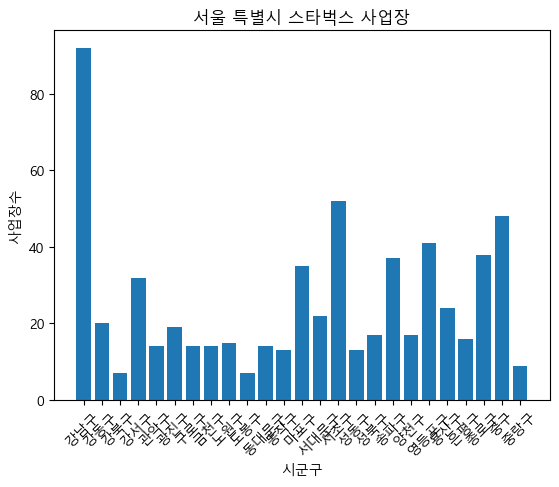

In [ ]:
plt.bar(data_5['시군구'], data_5['사업장수'])
plt.xticks(rotation=45) # x축 타이틀 기울기 45도
plt.title('서울 특별시 스타벅스 사업장')
plt.xlabel('시군구')
plt.ylabel('사업장수')

plt.show()

- 이 자료를 가지고 다른 데이터와 관련하여 다른 데이터를 예측하는 등의 학습을 시킬 수 있다. '강남에는 오피스가 많다'라는 데이터를 이용하여 '오피스가 많은 곳에는 스타벅스 매장이 많다'라는 규칙을 머신러닝에 학습시켜 예측 알고리즘을 만드는 등의 활용을 할 수 있다.


In [78]:
# 이상치 처리
# data
import numpy as np
import pandas as pd

data = {'score': [70,75,80,85,90,150]}
df = pd.DataFrame(data)
print(df)

   score
0     70
1     75
2     80
3     85
4     90
5    150


In [81]:
# IQR
Q1 = df['score'].quantile(0.25) #1사분위값
print(Q1)

Q3 = df['score'].quantile(0.75) #3사분위값
print(Q3)

IQR = Q3-Q1
print(IQR)

76.25
88.75
12.5


In [82]:
#이상치의 범위
low_ = Q1 - 1.5*IQR
up_ = Q3 + 1.5*IQR


In [ ]:
print('이상치의 범위: ',f'{low_}보다 작거나, {up_}보다 큰 값')
# IQR이 100을 넘어가면 max를 100으로 맞춰주는 과정이 필요함

이상치의 범위:  57.5보다 작거나, 107.5보다 큰 값


In [86]:
outliers = df[(df['score'] < low_) | (df['score'] > up_)]
print('제거 대상(이상치): ', outliers)

제거 대상(이상치):     score
5    150


In [87]:
#이상치 제거
df_1 = df[(df['score']>=low_) & (df['score'] <= up_)]
print(df_1)

   score
0     70
1     75
2     80
3     85
4     90


In [89]:
# 이상치 값을 변경(치환)
df['score'] = df['score'].astype(float) #수치 연산. 정수 형태보다 float 형태로 주로 계산  
df.loc[df['score'] < low_, 'score'] = low_
df.loc[df['score'] > up_, 'score'] = up_

In [ ]:
print(df)   # index 5번 값이 150 --> 107.5(up_값)으로 변경

   score
0   70.0
1   75.0
2   80.0
3   85.0
4   90.0
5  107.5


In [101]:
#중복 데이터 
# pandas 중복 데이터 확인 및 제거
import pandas as pd
# 예제 데이터
data = {
    'Name': ['Alice', 'Bob', 'Alice', 'Charlie', 'Bob'],
    'Age': [25, 30, 25, 35, 30],
    'Score': [85, 90, 85, 95, 90]
}

df = pd.DataFrame(data)
print('원본 데이터프레임:')
print(df)
# Alicem Bob은 완전 중복

원본 데이터프레임:
      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [ ]:
#중복검사. 첫 번째 나오는 행은 중복으로 판단하지 않는다.
df.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [93]:
#중복 데이터 제거(행의 모든 열의 값이 같은 경우)
df_1 = df.drop_duplicates(keep='first') #keep='first' or keep='last'. 첫 번째 혹은 마지막을 유지
print('1. 중복 데이터 제거(첫 번쨰 데이터 유지) ')
print(df_1)

1. 중복 데이터 제거(첫 번쨰 데이터 유지) 
      Name  Age  Score
0    Alice   25     85
1      Bob   30     90
3  Charlie   35     95


In [ ]:
df_1 = df.drop_duplicates(keep='last') #keep='first' or keep='last'. 첫 번째 혹은 마지막을 유지
print('1. 중복 데이터 제거(마지막 데이터 유지) ')
print(df_1)

2. 중복 데이터 제거(마지막 데이터 유지) 
      Name  Age  Score
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [100]:
# 특정 열(['name']을 기준으로 중복 행 삭제. duplicates()의 매개변수를 변경하여 구현
df_2 = df.drop_duplicates(subset=['Name'],keep='last')  # name 열의 값이 같으면 제거.
print('2. NAme열의 값을 기준으로 행 삭제')
print(df_2)

2. NAme열의 값을 기준으로 행 삭제
      Name  Age  Score
2    Alice   25     85
3  Charlie   35     95
4      Bob   30     90


In [ ]:
#중복 모두 삭제. (중복이 있으면 모두 삭제)
df_3 = df.drop_duplicates(keep=False)   #데이터 유지 안함.
print(df_3)

      Name  Age  Score
3  Charlie   35     95
